**YOUR NAMES HERE**

Fall 2025

CS 343: Neural Networks

Project 1: Single-layer networks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from adaline import Adaline

# Set the color style so that Professor Layton can see your plots
plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
# Make the font size larger
plt.show()
plt.rcParams.update({'font.size': 18})

# Turn off scientific notation when printing
np.set_printoptions(suppress=True, precision=3)

# Automatically reload your external source code
%load_ext autoreload
%autoreload 2


def plot_adaline_train(net, loss_list, acc_list, plotMarkers=False, title='ADALINE'):
    '''Helper plotting function provided for you.'''
    n_epochs = len(loss_list)

    x = np.arange(1, n_epochs+1)

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
    fig.suptitle(f'{title} ({n_epochs} epochs)')

    curveStr = '-r'
    if plotMarkers:
        curveStr += 'o'

    ax1.plot(x, loss_list, curveStr)
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss (Sum squared error)')
    ax2.plot(x, acc_list, curveStr)
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')

    plt.show()

**Paste in your code to load Old Faithful data with standardized features below**

In [13]:
# YOUR CODE HERE
faithful_df = pd.read_csv('data/old_faithful.csv')

data = faithful_df.drop(['sample', 'severe'], axis = 1).to_numpy()
standardized_data = (data - data.mean(axis=0)) / data.std(axis=0)
# print(standardized_data[0:5])

## Task 4: Neural network for regression

Given ADALINE's linear (identity) activation and sum-of-squares loss function, the learned weights can be used for more than just classification. In this task, you will use ADALINE to perform a linear regression (*the same neural network offers another interpretation of what you did in CS251!*).

### Goal

Your goal is to get an ADALINE network to predict `waiting` from `eruptions`. That is, you are setting up a simple (bivariate) linear regression with equation $$y_i = m \times x_i + b$$where the "x" variable (*predictor variable*) is `eruptions` and the "y" variable (*response variable*) is `waiting` (raw).

**Ultimately, you want to draw a regression line *through* the Old Faithful data clusters to *join* rather than divide them.**

### Design

You can do the regression with the exact network you have currently implemented. **You shouldn't make any code changes to your `Adaline` class.**  In the cell below, use your network to set up the regression by making appropriate design choices:
- Network input features: How many? What should they be?
- Weights: What do they mean in this problem context?
- What are the "classes"?

### Tips

- I suggest using the standardized version of the predictor (otherwise you may run into numeric stability issues), but it's fine to use the raw/unstandardized response variable. 
- Default hyperparameters should work well.
- You may need to add a singleton dimension after selecting your input predictor feature below so that your existing code works i.e. `shape=(272,1)`, NOT `shape=(272,)`

**Write your training code in the cell below.**

In [ ]:
# YOUR CODE HERE
adaline = Adaline()
X = standardized_data[:, 0]
# print(X.shape)
y = standardized_data[:, 1]

x = np.expand_dims(X, axis=1)  # shape (272, 1)
print(x.shape)

loss_list, acc_list = adaline.fit(x, y)

(272, 1)


In the cell below, **create a scatter plot of the data and the overlayed regression line**. Have the x-axis map onto standardized `eruptions` and y-axis onto raw `waiting` values.

### Tips
- You will need to leverage the model linear equation to go from x values to predicted y values. $y_i = m \times x_i + b$
- Look at the class boundary plot code that you used for classification. You will need to generate linearly spaced x values before plotting your regression y values on your regression line. 

(272,)


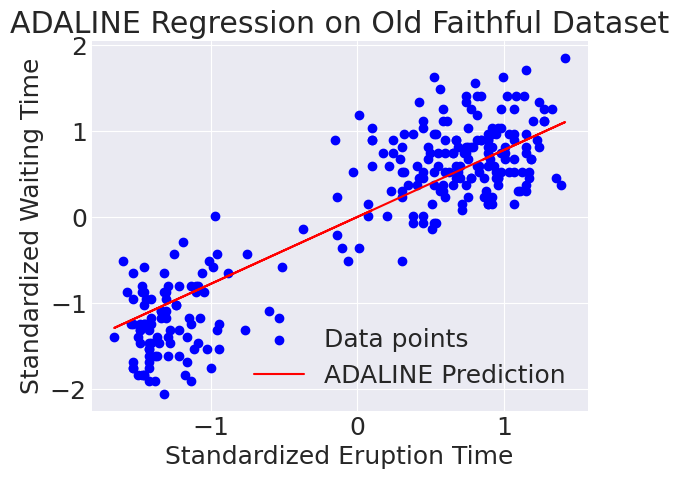

In [20]:
# YOUR CODE HERE
# plt.scatter(X, y, color='blue', label='Data points')
weights, bias, loss_list, acc_list = adaline.fit(x, y)

predicted_y = x@weights + bias 
print(predicted_y.shape)

plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predicted_y, color='red', label='ADALINE Prediction')
plt.xlabel('Standardized Eruption Time')
plt.ylabel('Standardized Waiting Time')
plt.title('ADALINE Regression on Old Faithful Dataset')
plt.legend()
plt.show()


## Task 5: ADALINE and logistic regression

In this task, you will extend ADALINE to logistic regression, where we explicitly represent the probability of class membership.

For example data point $i$ is 80% likely to be in class A and 20% in class B.

**Remember:** Despite the name, logistic regression is actually about solving a **classification** problem. So this is more similar to Task 3 than Task 4.

### 5a. Implement logistic regression

Create a subclass of `Adaline` called `AdalineLogistic` in a new file called `adaline_logistic.py`. **Only override existing methods as needed to make the following changes. DO NOT MODIFY `adaline.py` FOR ANY REASON!!**.

#### Design

1. Use the sigmoid activation function. $z = f(x) = \frac{1}{1+e^{-x}}$
2. Represent the output classes as 0 or +1. This should require a code change (activation values >=0.5 are classified as 1, otherwise class 0) and preprocessing of the old faithful data.
3. Use the cross-entropy loss function: $\sum_{i=1}^n \left [ -y_i Log(z_i) - (1-y_i)Log(1 - z_i) \right ] $
where $z_i$ is the activation to input sample $i$ and $y_i$ is the corresponding $i^{th}$ class label (0 or 1).


#### Todo below:

1. Train your network using the standardized Old Faithful data. Default hyperparameters should work fine.
2. Plot your loss and accuracy as a function of epoch.
3. Plot the logistic regression decision boundary and the data (Use your code from Task 2).

#### Questions

**Question 11.** Why do we need to relabel the classes from -1/+1 to 0/1 when training a logistic regression network?

**Answer 11:**

YOUR ANSWER HERE

In [ ]:
# YOUR CODE HERE

In [ ]:
# YOUR CODE HERE

### 5b. Test point probabilities

#### Questions

**Question 12.** (a) Determine the probability that the following test points belong to **both classes**:

Format: standardized (eruptions, waiting)
- (0.4, 0.98)
- (0.5, -2)
- (-1, 0.5)

(b) Interpret what your probabilities make sense in light of decision boundary plot you made in Task 5a.

**Answer 12:**

YOUR ANSWER HERE

In [ ]:
# YOUR CODE HERE

## Extensions

Before starting your extensions, please keep these guidelines in mind.

### General guidelines

1. Never integrate extensions into your base project so that they change the expected behavior of core functions. If your extension changes the core design/behavior, no problem, duplicate your working base project and add features from there.
2. Check the rubric to keep in mind how extensions on this project will be graded.
3. While I may consult your code and "written log" of what you did, **I am grading your extensions based on what you present in your 3-5 min video.**
3. I suggest documenting your explorations in a "log" or "lab notebook" style (i.e. documenting your thought/progression/discovery/learning process). I'm not grading your writing, so you can keep it succinct. **Whatever is most useful to you to remember what you did.** 
4. I suggest taking a hypothesis driven approach. For example "I was curious about X so I explored Y. I found Z, which was not what I expected because..., so then tried A..."
5. Make plots to help showcase your results.
6. **More is not necessarily better.** Generally, a small number of "in-depth" extensions count for more than many "shallow" extensions.

### AI guidelines

You may use AI in mostly any capacity for extensions. However, keep in mind:
1. There is no need to use AI at all!
2. You are welcome to use AI as a tool (e.g. automate something that is tedious, help you get unstuck, etc.). However, you should be coding, you should be thinking, you should be writing, you should be creating. If you are spending most (or even close to most) of your time typing into a chatbot and copy-pasting, you have probably gone too far with AI use.
3. I don't find large volumes of AI generated code/text/plots to be particularly impressive and you risk losing my interest while grading. Remember: I'm grading your extensions based on your video presentation. **More is not necessarily better.**

### Video guidelines

1. Please try to keep your video to 5 minutes (*I have other projects to grade!*). If you turn in a longer video, I make no promise that I will watch more than 5 minutes.
2. Your screen should be shared as you show me what you did. A live video of your face should also appear somewhere on the screen (e.g. picture-in-picture overlay / split screen).
3. Your partner should join you for the video and take turns talking, but, if necessary, it is fine to have one team member present during the record the video.
4. Do not simply read text from your notebook, do not read from a prepared script. I am not grading how polished your video presentation is (see extension grading criteria on rubric). 
5. I am looking for original and creative explorations sparked by your curiosity/interest/passion in a topic. This should be apparent in your video.
6. Be natural, don't feel the need to impress me with fancy language. If it is helpful, imagine that we are talking one-on-one about your extension. Tell me what you did :)

### Extension ideas

1. Extend the ADALINE model to multi-class classification using the One-Vs-Rest (OvR) method. Recall that with this scheme, we train multiple networks with each of the $n$ output classes serving as the +1 class (others set to 0 class). For example, for classes [a, b, c] would would train the networks with the following class labels: [1, 0, 0], [0, 1, 0], [0, 0, 1], respectively. We then classify based on the class that generates the highest max probability / activation value. Test it on a dataset with more than two classes (e.g. Iris). 
2. Create plots of the ADALINE regression after training on different numbers of epochs. One options is to plot all the curves in a single plot and establish a color scheme for time so that the viewer can visually discern the time sequence. Another possibility is to create a NxM grid of plots showing the progression (be sure to label the titles with #epochs).
3. Demonstrate how ADALINE can handle multiple linear regression.
4. Test the performance of single layer neural networks at classifying a binary class dataset of your choice.
5. Compare the performance of ADALINE, Perceptron, and Logistic Regression single-layer networks in additional ways and/or with additional datasets.
6. Research, implement, and analyze a neural network technique called early stopping. In essence, you stop training when the change in loss between successive epochs drops below some threshold. You can make your early stopping implementation fancier. For example, only stop if the change relative to the average loss over the most recent few epochs is less than the tolerance. Why could this be an improvement over the other method?
7. K-fold cross validation.